In [ ]:
# Instalar librerías necesarias (si no están instaladas en Colab)
!pip install -q kaggle transformers huggingface_hub

In [ ]:
# LIBRERÍAS PRINCIPALES
from pathlib import Path             # Manejo de rutas de archivos compatible con todos los sistemas operativos
import os                            # Interacción con el sistema operativo (carpetas, archivos, entorno)
import re                            # Expresiones regulares para limpiar texto
import time                          # Control de tiempo y pausas en ejecuciones
import pandas as pd                  # Manipulación de datos tabulares (DataFrames)
import numpy as np                   # Operaciones numéricas y vectorizadas
import matplotlib.pyplot as plt      # Creación de gráficos básicos
import seaborn as sns                # Visualización estadística avanzada sobre matplotlib

# LIBRERÍAS EXTERNAS PARA APIs
from kaggle.api.kaggle_api_extended import KaggleApi   # Descarga de datasets desde tu cuenta de Kaggle
from huggingface_hub import login                      # Autenticación con Hugging Face Hub mediante token
from transformers import pipeline                      # Uso de modelos preentrenados (como análisis de sentimiento)

In [ ]:
# CONFIGURACIÓN GLOBAL DE ESTILO PARA GRÁFICAS
plt.style.use("seaborn-v0_8-whitegrid")   # Estilo visual con fondo blanco y rejilla suave para todo el notebook

# PALETA DE COLORES PERSONALIZADA SEGUIDORES
SEGUIDORES = {
    "TOTAL SEGUIDORES": "#6A5ACD",
    "SEGUIDORES RELEVANTES": "#2E8B57",
    "SEGUIDORES NO RELEVANTES":  "#34495E",
}

In [ ]:
# Subir tu kaggle.json
from google.colab import files
files.upload()  # 👉 Aquí seleccionas el archivo kaggle.json desde tu PC

# Crear carpeta y mover el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset desde Kaggle (guarda en /content)
!kaggle datasets download -d kaushiksuresh147/bitcoin-tweets -p /content

# Descomprimir el ZIP en una carpeta llamada bitcoin_tweets
!unzip -q /content/bitcoin-tweets.zip -d /content/bitcoin_tweets

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets
License(s): CC0-1.0
 98% 684M/695M [00:07<00:00, 107MB/s]
100% 695M/695M [00:08<00:00, 89.1MB/s]


In [ ]:
# Definimos la ruta al directorio donde quedaron los archivos descomprimidos de Kaggle
# En este caso, tras usar unzip, los archivos quedaron en /content/bitcoin_tweets

from pathlib import Path
DATA_DIR = Path("/content/bitcoin_tweets")  # Esta será la ruta base para cargar los archivos del dataset

In [ ]:
# Listar los archivos que hay dentro del directorio
for root, dirs, files in os.walk(DATA_DIR):
    print("📂", root)
    for file in files:
        print("   -", file)

📂 /content/bitcoin_tweets
   - Bitcoin_tweets_dataset_2.csv
   - Bitcoin_tweets.csv


In [ ]:
# Definimos la ruta completa al archivo CSV principal
csv_path = DATA_DIR / "Bitcoin_tweets.csv"

# Cargamos el archivo en un DataFrame de pandas
# lineterminator="\n" → previene errores por saltos de línea en campos de texto
# low_memory=True → optimiza la carga para archivos grandes
df = pd.read_csv(csv_path, lineterminator="\n", low_memory=True)

# Mostramos dimensiones y primeras filas
print("📐 Dimensiones del DataFrame:", df.shape)
df.head(10)

/tmp/ipython-input-3367438134.py:7: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, lineterminator="\n", low_memory=True)


📐 Dimensiones del DataFrame: (4689354, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


count    4.689354e+06
mean     8.155689e+03
std      9.931331e+04
min      0.000000e+00
25%      5.100000e+01
50%      2.380000e+02
75%      1.422000e+03
max      2.413135e+07
Name: user_followers, dtype: float64


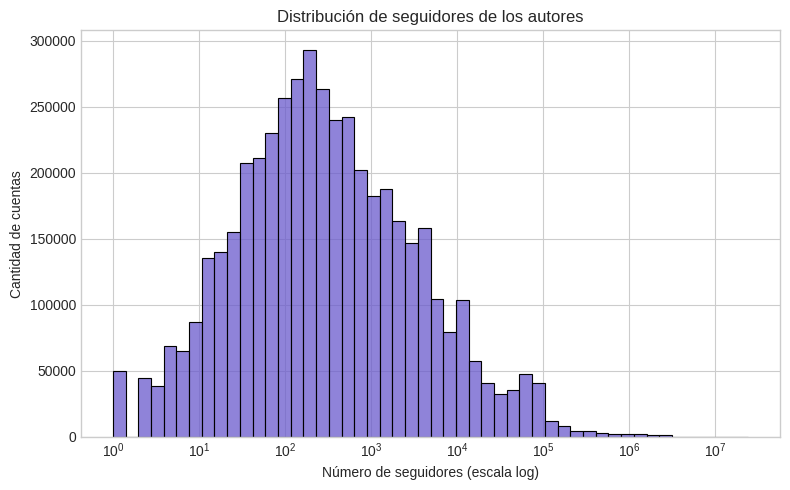

In [ ]:
# Convertir la columna 'user_followers' a numérico, reemplazando strings o valores nulos por cero
df["user_followers"] = pd.to_numeric(df["user_followers"], errors="coerce").fillna(0)

# Mostrar estadísticas descriptivas básicas sobre la cantidad de seguidores
print(df["user_followers"].describe())

# Visualizar la distribución de seguidores usando escala logarítmica
plt.figure(figsize=(8, 5))
sns.histplot(df["user_followers"], bins=50, log_scale=True, color=SEGUIDORES["TOTAL SEGUIDORES"])
plt.title("Distribución de seguidores de los autores")
plt.xlabel("Número de seguidores (escala log)")
plt.ylabel("Cantidad de cuentas")
plt.tight_layout()
plt.show()

## 📊 Distribución de seguidores de los autores en Twitter

Para analizar la **relevancia de los tweets**, un buen punto de partida es observar cuántos seguidores tienen los usuarios que publicaron sobre Bitcoin.

### 🔹 Transformación previa
- La columna `user_followers` se convirtió a valores numéricos, eliminando posibles errores de formato (valores nulos o cadenas).
- Se rellenaron los `NaN` con `0`.

### 🔹 Escala logarítmica
El histograma se graficó en **escala logarítmica**, lo que significa que:
- En lugar de mostrar los seguidores como 1, 2, 3, 4…, se agrupan en potencias de 10 (10, 100, 1000, 10.000, 100.000, etc.).
- Esto es útil porque la mayoría de usuarios tiene pocos seguidores (menos de 1000), mientras que unos pocos tienen cifras enormes (millones).  
- Sin la escala log, esos valores extremos aplastarían toda la gráfica y no se vería nada en el rango bajo.

### 📈 Estadísticas descriptivas principales
- **Mediana (50%)** = **238 seguidores** → la mitad de los tweets provienen de cuentas muy pequeñas.  
- **Cuartil 75%** = **1.422 seguidores** → solo el 25% de las cuentas supera esta cifra.  
- **Máximo** = **24 millones de seguidores** → unos pocos outliers (cuentas muy influyentes).  

### 💡 Interpretación
- La gran mayoría de los tweets provienen de **usuarios comunes con bajo alcance**.  
- Sin embargo, existe una **minoría de cuentas muy influyentes** que concentran una audiencia masiva.  
- Esto refuerza la importancia de aplicar un **filtro de relevancia** (ej. usuarios con más de 1000 seguidores o verificados), para que el análisis de sentimiento se enfoque en tweets con mayor impacto real.

Tweets totales: 4,689,354
Tweets relevantes (≥10k seguidores o verificado, sin RT): 398,879  (8.51%)


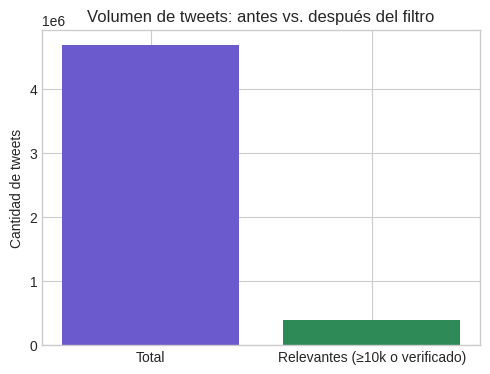

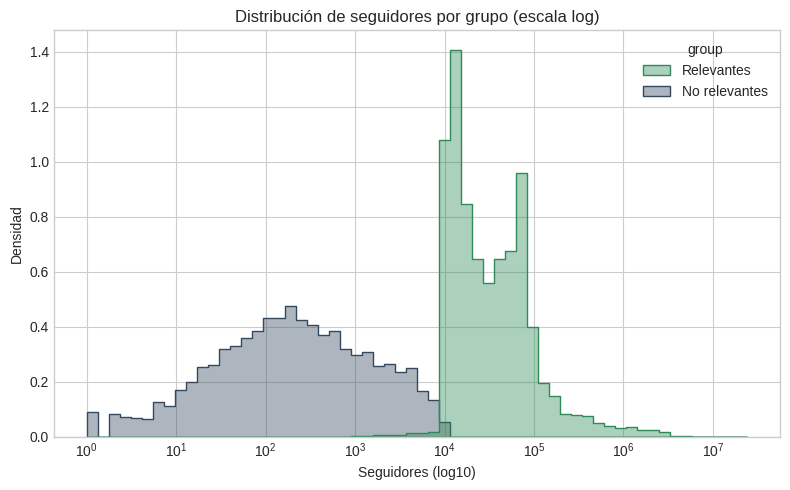

In [ ]:
# Tipos correctos (robustos ante strings/booleanos)
df["user_followers"] = pd.to_numeric(df["user_followers"], errors="coerce").fillna(0)

# Si ya son booleanos reales, esto no los daña; si son strings "true"/"false", los mapea:
df["user_verified"] = (
    df["user_verified"]
    .astype(str).str.strip().str.lower()
    .map({"true": True, "false": False})
    .fillna(False)
)

df["is_retweet"] = (
    df["is_retweet"]
    .astype(str).str.strip().str.lower()
    .map({"true": True, "false": False})
    .fillna(False)
)

# MÁSCARA única del filtro: (≥10k seguidores O verificado) Y NO retweet ---
mask_relevantes = ((df["user_followers"] >= 10_000) | (df["user_verified"])) & (~df["is_retweet"])

# APLICAR el filtro (¡aquí estaba el fallo!)
df_filtered = df.loc[mask_relevantes].copy()

# Métricas resumen
n_total = len(df)
n_keep = len(df_filtered)
pct_keep = 100 * n_keep / max(n_total, 1)
print(f"Tweets totales: {n_total:,}")
print(f"Tweets relevantes (≥10k seguidores o verificado, sin RT): {n_keep:,}  ({pct_keep:.2f}%)")

# Gráfico 1: Volumen antes vs después
plt.figure(figsize=(5,4))
plt.bar(
    ["Total", "Relevantes (≥10k o verificado)"],
    [n_total, n_keep],
    color=[SEGUIDORES["TOTAL SEGUIDORES"], SEGUIDORES["SEGUIDORES RELEVANTES"]]
)
plt.title("Volumen de tweets: antes vs. después del filtro")
plt.ylabel("Cantidad de tweets")
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de seguidores (log) retenidos vs descartados
# Para no explotar RAM con millones de "No relevantes", muestreamos los descartados.
import numpy as np
no_rel_mask = ~mask_relevantes
n_no_rel = int(no_rel_mask.sum())
sample_n = min(300_000, n_no_rel)  # ajusta si quieres más/menos
no_rel_sample = df.loc[no_rel_mask, "user_followers"].sample(n=sample_n, random_state=42) if n_no_rel > 0 else pd.Series([], dtype=float)

df_plot = pd.concat([
    df_filtered[["user_followers"]].assign(group="Relevantes"),
    no_rel_sample.to_frame(name="user_followers").assign(group="No relevantes")
], ignore_index=True)

plt.figure(figsize=(8,5))
sns.histplot(
    data=df_plot,
    x="user_followers",
    hue="group",
    bins=60,
    log_scale=True,
    element="step",
    stat="density",
    common_norm=False,
    alpha=0.4,
    palette={
        "Relevantes": SEGUIDORES["SEGUIDORES RELEVANTES"],
        "No relevantes": SEGUIDORES["SEGUIDORES NO RELEVANTES"]
    }
)
plt.title("Distribución de seguidores por grupo (escala log)")
plt.xlabel("Seguidores (log10)")
plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

## Filtro de relevancia: ≥ 10.000 seguidores o cuenta verificada

**Objetivo:** enfocar el análisis en tweets con **capacidad real de influir** en la conversación y, potencialmente, en el precio de Bitcoin.

### Criterios aplicados
- **Excluir retweets** → solo contenido original, evitando duplicados.  
- **Incluir si se cumple al menos uno:**  
  1. `user_followers ≥ 10.000` → cuentas con alcance masivo.  
  2. `user_verified == True` → perfiles reconocidos, incluso con menos seguidores.  

El umbral de **10k** es un equilibrio:  
- **1k** → conserva demasiado ruido.  
- **50k** → deja muy pocos datos.  
- **10k** → asegura influencia real con tamaño de muestra suficiente.  

### Resultados del filtrado
- **Tweets totales:** 4.689.354  
- **Tweets relevantes:** 398.879 (≈8.5%)  

➡️ Menos del 10% de los tweets tienen un potencial de impacto significativo.

### Visualizaciones
1. **Volumen antes vs. después:** muestra la fuerte reducción tras aplicar el filtro.  
   → La mayoría de tweets provienen de cuentas pequeñas.  
2. **Distribución de seguidores (escala logarítmica):**  
   - *No relevantes* (azul): concentrados entre 10 y 1.000 seguidores.  
   - *Relevantes* (naranja): desde 10k hasta más de 1M.  
   - Escala log usada porque el rango va de **1 a 24M seguidores**, y sin log los outliers distorsionan la gráfica.  

### Conclusión metodológica
El filtrado **elimina ruido** de microcuentas y concentra el análisis en **actores con alcance y credibilidad** (medios, analistas, traders influyentes).  
Así, el análisis de sentimientos posterior será **más robusto y representativo del impacto real en el mercado**.

In [ ]:
# Dimensiones (filas, columnas)
print("📐 Dimensiones:", df_filtered.shape)

# Nombres de columnas
print("\n🧾 Columnas:")
print(df_filtered.columns.tolist())

# Estadísticas generales (solo numéricas)
print("\n📊 Estadísticas:")
print(df_filtered.describe())

# Primeras filas de muestra
df_filtered.head()

📐 Dimensiones: (398879, 13)

🧾 Columnas:
['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet']

📊 Estadísticas:
       user_followers
count    3.988790e+05
mean     8.631802e+04
std      3.305271e+05
min      3.600000e+01
25%      1.358200e+04
50%      2.693800e+04
75%      6.572900e+04
max      2.413135e+07


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
16,Mr. Anderson,NaN,#Bitcoin\nLong Term TA Trader. Mixing Old Scho...,2018-01-01 22:16:16,72542.0,519,19763,False,2021-02-10 23:48:37,@naval #BTC is unconfiscatable \n\nAll roads l...,"['BTC', 'Bitcoin']",Twitter for iPhone,False
23,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822,40097,True,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...,['Bitcoin'],Hootsuite Inc.,False
35,Dr. ir Johannes Drooghaag (JD) 🛡,"Germany, Europe",Proud Dad ° CEO Spearhead Management @Spearhea...,2015-08-18 13:57:19,30610.0,3470,236638,False,2021-02-10 23:38:52,🔵 Upfront and Personal!\n\nEpisode 3: Blockcha...,"['CyberSecurity', 'Blockchain', 'Crypto']",Twitter Web App,False
85,Simon Johnson,Australia 🇦🇺,Security • Risk • Ex Banker • Online Since 198...,2008-04-23 06:58:19,11784.0,3811,110,False,2021-02-10 23:15:40,Big news from MasterCard. They are working to ...,['crypto'],Twitter for iPhone,False
114,Bitcoin Archive 🗄🚀🌔,Decentralised,Follow as we track #Bitcoin prove them all wro...,2018-03-06 12:08:27,22406.0,443,39583,False,2021-02-10 23:01:49,$129m of Bitcoin was just moved from one cold ...,NaN,Twitter for iPhone,False


In [ ]:
# función para limpiar el texto de los tweets
def clean_tweet(text):
    text = str(text).lower()                                   # convierte todo el texto a minúsculas
    text = re.sub(r"http\S+|www\S+", "", text)                 # elimina los links (http o www)
    text = re.sub(r"@\w+", "", text)                           # elimina menciones con @usuario
    text = re.sub(r"rt\s+", "", text)                          # elimina la palabra "RT" de retweets
    text = re.sub(r"[^a-zA-Z\s#]", "", text)                   # elimina símbolos y números, conserva letras y hashtags
    text = re.sub(r"\s+", " ", text).strip()                   # reemplaza múltiples espacios por uno y elimina espacios al inicio/fin
    return text

# aplica la función de limpieza a la columna original 'text'
df_filtered["clean_text"] = df_filtered["text"].apply(clean_tweet)

# muestra una vista previa con fecha, texto original y texto limpio
df_filtered[["date", "text", "clean_text"]].head(10)

,date,text,clean_text
16,2021-02-10 23:48:37,@naval #BTC is unconfiscatable \n\nAll roads l...,#btc is unconfiscatable all roads lead to #bit...
23,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...,#bitcoins rally signals the rise of digital as...
35,2021-02-10 23:38:52,🔵 Upfront and Personal!\n\nEpisode 3: Blockcha...,upfront and personal episode blockchain and cr...
85,2021-02-10 23:15:40,Big news from MasterCard. They are working to ...,big news from mastercard they are working to s...
114,2021-02-10 23:01:49,$129m of Bitcoin was just moved from one cold ...,m of bitcoin was just moved from one cold stor...
116,2021-02-10 23:00:03,Top 10 Trading Volume in the last 24 hours\n$b...,top trading volume in the last hours btc #btc ...
125,2021-02-10 22:59:20,https://t.co/zdsqyF1dxf #Ethereum killers and ...,#ethereum killers and layer tokens rally despi...
136,2021-02-10 22:54:18,#ethereum killers and layer-2 tokens rally des...,#ethereum killers and layer tokens rally despi...
138,2021-02-10 22:53:26,@NewBoldNewYork @Manh8tan #FreeBitcoin #Bitco...,#freebitcoin #bitcoin #btc #bitcoinmining #elo...
139,2021-02-10 22:53:23,"Bitcoin still trading at AU$ 61,139.16 this mo...",bitcoin still trading at au this morning #btc ...


In [ ]:
# Eliminar solo la columna 'text'
if "text" in df_filtered.columns:
    df_filtered = df_filtered.drop(columns=["text"])

In [ ]:
df_filtered

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
16,Mr. Anderson,NaN,#Bitcoin\nLong Term TA Trader. Mixing Old Scho...,2018-01-01 22:16:16,72542.0,519,19763,False,2021-02-10 23:48:37,"['BTC', 'Bitcoin']",Twitter for iPhone,False,#btc is unconfiscatable all roads lead to #bit...
23,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822,40097,True,2021-02-10 23:45:03,['Bitcoin'],Hootsuite Inc.,False,#bitcoins rally signals the rise of digital as...
35,Dr. ir Johannes Drooghaag (JD) 🛡,"Germany, Europe",Proud Dad ° CEO Spearhead Management @Spearhea...,2015-08-18 13:57:19,30610.0,3470,236638,False,2021-02-10 23:38:52,"['CyberSecurity', 'Blockchain', 'Crypto']",Twitter Web App,False,upfront and personal episode blockchain and cr...
85,Simon Johnson,Australia 🇦🇺,Security • Risk • Ex Banker • Online Since 198...,2008-04-23 06:58:19,11784.0,3811,110,False,2021-02-10 23:15:40,['crypto'],Twitter for iPhone,False,big news from mastercard they are working to s...
114,Bitcoin Archive 🗄🚀🌔,Decentralised,Follow as we track #Bitcoin prove them all wro...,2018-03-06 12:08:27,22406.0,443,39583,False,2021-02-10 23:01:49,NaN,Twitter for iPhone,False,m of bitcoin was just moved from one cold stor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689305,Crypto Volume,NaN,Get alerted on abnormal volume moves in the cr...,2022-02-19 12:41:04,20633.0,0,0,False,2023-01-06 17:50:14,"['BTSUSDT', 'crypto', 'whale', 'btc', 'eth', '...",abnormal_crypto_app,False,#btsusdt bear alert x volume price min volume ...
4689310,John Morgan,"For now, Earth","Even when he has a 50/50 shot, the odds are 80...",2013-12-08 02:06:19,28480.0,621,112,False,2023-01-06 17:49:46,"['CZ', 'BTC', 'Trading']",Twitter Web App,False,#cz proclaims bianance surge is due to #btc ze...
4689328,Crypto Volume,NaN,Get alerted on abnormal volume moves in the cr...,2022-02-19 12:41:04,20633.0,0,0,False,2023-01-06 17:48:25,"['BTSUSDT', 'crypto', 'whale', 'btc', 'eth', '...",abnormal_crypto_app,False,#btsusdt bear alert x volume price min volume ...
4689329,Crypto Volume,NaN,Get alerted on abnormal volume moves in the cr...,2022-02-19 12:41:04,20633.0,0,0,False,2023-01-06 17:48:25,"['BTSUSDT', 'crypto', 'whale', 'btc', 'eth', '...",abnormal_crypto_app,False,#btsusdt bear alert x volume price min volume ...


## Limpieza de texto

**Objetivo:** preparar los tweets para el análisis de sentimientos eliminando ruido y manteniendo solo la información relevante.

### Transformaciones aplicadas
1. **Minúsculas:** se pasa todo el texto a minúsculas para mantener consistencia.  
2. **Eliminación de links:** se eliminan URLs (`http://...` o `https://...`) ya que no aportan valor al sentimiento.  
3. **Eliminación de menciones:** se eliminan usuarios (`@nombre`) porque no influyen en el análisis semántico.  
4. **Retweets:** se quita el prefijo `RT` para evitar redundancia.  
5. **Filtrado de caracteres:** se dejan solo letras y hashtags (`#`), eliminando números, símbolos o signos de puntuación.  
6. **Normalización de espacios:** se reducen múltiples espacios a uno solo y se eliminan los espacios al inicio o final.  

### Resultado
Se crea una nueva columna `clean_text` con el contenido depurado y listo para el análisis de sentimientos.  

👉 Esto asegura que el modelo trabaje con un texto **limpio, uniforme y enfocado** en el mensaje real de cada tweet.

In [ ]:
# Guardar tu DataFrame limpio y comprimido en GZ
df_filtered.to_csv("df_filtered_limpio.csv.gz", index=False, compression="gzip")
print("✅ Dataset limpio guardado como: df_filtered_limpio.csv.gz")

# Descargar al ordenador
from google.colab import files
files.download("df_filtered_limpio.csv.gz")

✅ Dataset limpio guardado como: df_filtered_limpio.csv.gz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Subir el archivo GZ desde tu computador
from google.colab import files
uploaded = files.upload()  # Selecciona "df_filtered_limpio.csv.gz"

import pandas as pd

# Leer directamente el GZ
df_filtered = pd.read_csv("df_filtered_limpio.csv.gz", compression="gzip", low_memory=False)

print("✅ Dataset cargado desde GZ y listo para usar")
print(df_filtered.shape)

Saving df_filtered_limpio.csv.gz to df_filtered_limpio.csv.gz
✅ Dataset cargado desde GZ y listo para usar
(398879, 13)


In [ ]:
# pega aquí tu token personal de Hugging Face
from huggingface_hub import login
login("XXXXXXXXXXXXXXXX")

In [2]:

import pandas as pd
import torch
from transformers import pipeline

# COMPROBAR GPU Y CONFIGURAR PIPELINE
use_gpu = torch.cuda.is_available()
device_id = 0 if use_gpu else -1
print(f"🔌 GPU disponible: {use_gpu}")

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest",
    device=device_id  # 0=GPU, -1=CPU
)

# PRUEBAS RÁPIDAS (con truncation correcto)
print(sentiment_pipeline("Bitcoin is going to the moon 🚀🚀🚀",
                         truncation=True, max_length=128, padding=True))
print(sentiment_pipeline("I lost everything on Bitcoin 😢",
                         truncation=True, max_length=128, padding=True))

# LIMPIEZA BÁSICA
assert "clean_text" in df_filtered.columns, "No encuentro la columna 'clean_text'."
# Si existe 'text' y ya no la necesitas, la eliminamos:
if "text" in df_filtered.columns:
    df_filtered = df_filtered.drop(columns=["text"])

df_filtered = df_filtered.dropna(subset=['clean_text']).reset_index(drop=True)

# (sin warnings y con GPU/CPU)
def analyze_sentiment_batch(series_text, batch_size=None, max_len=128):
    """
    series_text: pd.Series con textos
    batch_size: si None, elegimos según si hay GPU o CPU
    """
    if batch_size is None:
        batch_size = 256 if use_gpu else 200  # ajusta si hace falta
    labels, scores = [], []
    n = len(series_text)
    texts = series_text.astype(str).tolist()

    for i in range(0, n, batch_size):
        batch = texts[i:i+batch_size]
        preds = sentiment_pipeline(
            batch,
            truncation=True,
            max_length=max_len,
            padding=True,
            batch_size=batch_size
        )
        labels.extend([p["label"] for p in preds])
        scores.extend([p["score"] for p in preds])

        # Mini progreso cada ~50k registros
        if ((i // batch_size) % 200) == 0:
            print(f"➡️  Procesadas {min(i+batch_size, n):,}/{n:,}")

    return labels, scores

# EJECUTAR ANÁLISIS
labels, scores = analyze_sentiment_batch(df_filtered['clean_text'])

df_filtered['sentiment_label'] = labels
df_filtered['sentiment_score'] = scores

# VISTA RÁPIDA
print("✅ Primeras filas del DataFrame con sentimientos añadidos:")
try:
    display(df_filtered.head(10))
except NameError:
    print(df_filtered.head(10))

# GUARDAR Y DESCARGAR
output_path = "/content/bitcoin_tweets_labeled.csv.gz"
df_filtered.to_csv(output_path, index=False, compression="gzip")
print(f"💾 CSV guardado: {output_path}")

from google.colab import files
files.download(output_path)

🔌 GPU disponible: True


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9533762335777283}]
[{'label': 'negative', 'score': 0.9080461263656616}]
➡️  Procesadas 256/398,877


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


➡️  Procesadas 51,456/398,877
➡️  Procesadas 102,656/398,877
➡️  Procesadas 153,856/398,877
➡️  Procesadas 205,056/398,877
➡️  Procesadas 256,256/398,877
➡️  Procesadas 307,456/398,877
➡️  Procesadas 358,656/398,877
✅ Primeras filas del DataFrame con sentimientos añadidos:


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,sentiment_label,sentiment_score
0,Mr. Anderson,NaN,#Bitcoin\nLong Term TA Trader. Mixing Old Scho...,2018-01-01 22:16:16,72542.0,519.0,19763.0,False,2021-02-10 23:48:37,"['BTC', 'Bitcoin']",Twitter for iPhone,False,#btc is unconfiscatable all roads lead to #bit...,neutral,0.660573
1,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822.0,40097.0,True,2021-02-10 23:45:03,['Bitcoin'],Hootsuite Inc.,False,#bitcoins rally signals the rise of digital as...,positive,0.874618
2,Dr. ir Johannes Drooghaag (JD) 🛡,"Germany, Europe",Proud Dad ° CEO Spearhead Management @Spearhea...,2015-08-18 13:57:19,30610.0,3470.0,236638.0,False,2021-02-10 23:38:52,"['CyberSecurity', 'Blockchain', 'Crypto']",Twitter Web App,False,upfront and personal episode blockchain and cr...,neutral,0.833340
3,Simon Johnson,Australia 🇦🇺,Security • Risk • Ex Banker • Online Since 198...,2008-04-23 06:58:19,11784.0,3811.0,110.0,False,2021-02-10 23:15:40,['crypto'],Twitter for iPhone,False,big news from mastercard they are working to s...,neutral,0.604586
4,Bitcoin Archive 🗄🚀🌔,Decentralised,Follow as we track #Bitcoin prove them all wro...,2018-03-06 12:08:27,22406.0,443.0,39583.0,False,2021-02-10 23:01:49,NaN,Twitter for iPhone,False,m of bitcoin was just moved from one cold stor...,neutral,0.864148
5,CoinTrendz.com,NaN,📊Crypto Dashboard: https://t.co/mIQMmlsiOt! \...,2016-05-22 14:27:22,28538.0,3.0,312.0,False,2021-02-10 23:00:03,"['btc', 'bitcoin', 'cryptocurrency']",CoinTrendz,False,top trading volume in the last hours btc #btc ...,neutral,0.535588
6,#MakeADifference,Online,Are you ready to make a difference?\n\nGet $10...,2015-05-02 16:54:25,78779.0,46656.0,120853.0,False,2021-02-10 22:59:20,"['Ethereum', 'Bitcoin']",Twibble.io,False,#ethereum killers and layer tokens rally despi...,neutral,0.672123
7,BitcoinAgile,Matter Doesn't Matter,"Breaking News. Bitcoin, Blockchain & Beyond. #...",2014-01-07 23:52:46,54889.0,13381.0,4496.0,False,2021-02-10 22:54:18,"['ethereum', 'bitcoin', 'crypto', 'btc']",bitcoinagile,False,#ethereum killers and layer tokens rally despi...,neutral,0.713187
8,Free Bitcoin,NaN,#FreeBitcoin #Bitcoin #BTC #Bitcoinmining #El...,2018-08-10 06:29:19,33038.0,1024.0,8348.0,False,2021-02-10 22:53:26,"['FreeBitcoin', 'Bitcoin', 'BTC', 'Bitcoinmini...",Twitter for Android,False,#freebitcoin #bitcoin #btc #bitcoinmining #elo...,neutral,0.804690
9,T:HE:JAMES. HMRH,LORD HIS EXCELLENCY JAMES HRMH,"~~THE DUKE ARE MADE OF IRON, SILK & WOOD.~~",2010-06-25 15:15:04,30801.0,6517.0,4655.0,False,2021-02-10 22:53:23,"['BTC', 'Bitcoin']",Twitter Web App,False,bitcoin still trading at au this morning #btc ...,neutral,0.931613


💾 CSV guardado: /content/bitcoin_tweets_labeled.csv.gz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np

# Copia de trabajo (opcional)
df = df_filtered.copy()

# 1) Asegurar que 'date' sea datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # convierte; los inválidos quedan como NaT

# 2) Totales
total_tweets = len(df)

# 3) Rango de fechas (con manejo si todo es NaT)
fecha_inicio = df['date'].min()
fecha_fin    = df['date'].max()

# 4) Distribución de sentimientos (%), ordenando etiquetas estándar
sentiment_counts = (
    df['sentiment_label']
      .astype(str).str.lower()
      .value_counts(normalize=True) * 100
).reindex(['positive','neutral','negative'], fill_value=0).round(2)

# 5) Mostrar resumen
print(f"📈 Número total de tweets: {total_tweets:,}")
if pd.notna(fecha_inicio) and pd.notna(fecha_fin):
    print(f"📆 Rango de fechas: {fecha_inicio.date()} → {fecha_fin.date()}")
else:
    print("📆 Rango de fechas: no disponible (fechas inválidas o vacías)")

print("\n📊 Distribución de sentimientos (%):")
print(sentiment_counts)

📈 Número total de tweets: 398,877
📆 Rango de fechas: 2021-02-05 → 2023-01-09

📊 Distribución de sentimientos (%):
sentiment_label
positive    20.64
neutral     67.81
negative    11.55
Name: proportion, dtype: float64


## 🧠 Análisis de Sentimientos en Tweets sobre Bitcoin

Tras aplicar el modelo de **Hugging Face (RoBERTa entrenado en tweets)** a la base de datos filtrada, logramos clasificar **398.879 tweets relevantes** en tres categorías: positivo, negativo y neutral.

### 📊 Distribución de sentimientos
- **Neutral:** 270.462 (≈ 67.8%)  
- **Positivo:** 82.334 (≈ 20.6%)  
- **Negativo:** 46.083 (≈ 11.6%)

👉 La gran mayoría de mensajes son **neutrales**, reflejando publicaciones informativas, noticias o comentarios sin carga emocional fuerte.  
👉 El segundo grupo en importancia son los **positivos**, que destacan optimismo hacia Bitcoin (ej. “BTC is going to the moon 🚀”).  
👉 Los **negativos** son la minoría, pero aún significativos, concentrándose en caídas de precio, fraudes o críticas al mercado.

### 📌 Ejemplos observados
- **Neutral:** “#btc is unconfiscatable all roads lead to #bitcoin”  
- **Positivo:** “#bitcoins rally signals the rise of digital assets this bank is ahead of the game”  
- **Neutral:** “Big news from Mastercard. They are working to support #crypto”  

### ✅ Conclusión
- El dataset procesado nos da una **visión clara del tono del mercado cripto en Twitter**.  
- Predomina la neutralidad, pero con un volumen importante de mensajes optimistas.  
- Este resultado servirá como base para analizar **cómo las variaciones en el sentimiento se relacionan con el precio de Bitcoin**.

In [9]:
# Seleccionar solo las columnas necesarias
cols_keep = ['date', 'clean_text', 'sentiment_label', 'sentiment_score']
df_out = df[cols_keep].copy()

# Guardar comprimido en GZIP con el nombre elegido
out_path = "/content/tweets_≥10k_seguidores_sentimientos.csv.gz"
df_out.to_csv(out_path, index=False, compression="gzip")

print(f"✅ Archivo guardado: {out_path}")
print("Dimensiones:", df_out.shape)

# Descargar al computador
from google.colab import files
files.download(out_path)

✅ Archivo guardado: /content/tweets_≥10k_seguidores_sentimientos.csv.gz
Dimensiones: (398877, 4)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análisis de sentimiento en cuentas verificadas con más de un millón de seguidores

In [11]:
# Filtrar solo cuentas con >= 1 millón de seguidores
df_out_millon = df.loc[df["user_followers"] >= 1_000_000,
                       ['date', 'clean_text', 'sentiment_label', 'sentiment_score']].copy()

# Guardar comprimido en GZIP
out_path_millon = "/content/tweets_≥1M_seguidores_sentimientos.csv.gz"
df_out_millon.to_csv(out_path_millon, index=False, compression="gzip")

print(f"✅ Archivo guardado: {out_path_millon}")
print("Dimensiones:", df_out_millon.shape)

# Descargar al computador
from google.colab import files
files.download(out_path_millon)

✅ Archivo guardado: /content/tweets_≥1M_seguidores_sentimientos.csv.gz
Dimensiones: (5952, 4)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
df_out_millon

,date,clean_text,sentiment_label,sentiment_score
104,2021-02-10 15:23:58,it has to be paof the menu says on #bitcoin on...,neutral,0.867605
165,2021-02-10 08:05:10,novogratz predicts #bitcoin price will hit thi...,neutral,0.706053
408,2021-02-09 09:35:01,bitcoin price will hit soon popular #analyst s...,neutral,0.706823
466,2021-02-09 03:49:00,#bitcoin is an asset says i think in the futur...,neutral,0.537262
786,2021-02-08 16:47:25,#bitcoin is an asset says i think in the futur...,neutral,0.537262
...,...,...,...,...
397669,2023-01-07 13:32:40,#btc nears on saturday with #eth approaching,neutral,0.846662
397979,2023-01-07 08:28:06,#abplivecryptowatch heres a quick look at #cry...,neutral,0.925131
398373,2023-01-07 01:00:30,when #btc will be at m itll all be worth it st...,positive,0.911496
398422,2023-01-07 00:29:17,crypto news today #huobi to layoff of staff m ...,neutral,0.890083


In [13]:
# Total de tweets
total_tweets = len(df_out_millon)

# Rango de fechas
fecha_inicio = df_out_millon['date'].min()
fecha_fin    = df_out_millon['date'].max()

# Distribución de sentimientos (%)
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100

# Mostrar resumen
print(f"📈 Número total de tweets: {total_tweets:,}")
print(f"📆 Rango de fechas: {fecha_inicio.date()} → {fecha_fin.date()}")
print("\n📊 Distribución de sentimientos (%):")
print(sentiment_counts.round(2))

📈 Número total de tweets: 5,952
📆 Rango de fechas: 2021-02-06 → 2023-01-09

📊 Distribución de sentimientos (%):
sentiment_label
neutral     67.81
positive    20.64
negative    11.55
Name: proportion, dtype: float64


# Filtrado de cuentas con ≥1M seguidores

## Resumen de resultados
- 📈 **Número total de tweets:** 5,952  
- 📆 **Rango de fechas:** 2021-02-06 → 2023-01-09  

### Distribución de sentimientos (%)
- **Neutral:** 67.81 %  
- **Positivo:** 20.64 %  
- **Negativo:** 11.55 %  

## Criterios de filtrado
Aplicamos un filtro estricto sobre el dataset crudo (**4,689,354 tweets**):
- Condiciones: `user_followers ≥ 1,000,000` y se excluyeron retweets.  
- Resultado: **5,952 tweets** (≈ **0.127%** del total).  

## Lecturas de las gráficas
- **Volumen antes vs. después:**  
  El subconjunto de cuentas “élite” es ínfimo frente al universo total: apenas un 0.13% de la conversación. Esto confirma que la mayor parte del ruido proviene de cuentas pequeñas y medianas.  

- **Distribución de seguidores (escala log):**  
  La masa de tweets de “otros” usuarios se concentra entre 10²–10⁴ seguidores.  
  Las cuentas filtradas muestran un clúster definido en torno a 10⁶–10⁷ (influencers, medios, instituciones).  
  La separación clara entre ambas distribuciones valida el criterio de influencia.  

## Implicación para el estudio
Este recorte nos permite analizar si el **sentimiento emitido por emisores de gran alcance** (influencers, medios, figuras públicas) tiene un patrón diferente —o un **mayor poder explicativo**— que el sentimiento agregado del público general.